In [1]:
library(rpart)

In [2]:
print(summary(iris))

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                


In [3]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [4]:
set.seed(42)
trainingRowIndex <- sample(1:nrow(iris), 0.7*nrow(iris))
trainingData <- iris[trainingRowIndex,]
testData <- iris[-trainingRowIndex,]

In [5]:
dim(trainingData)

[1] 105   5

In [6]:
dim(testData)

[1] 45  5

In [7]:
colnames(iris)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

In [8]:
iris.tree <- rpart(Species~Sepal.Length+Sepal.Width+Petal.Length+Petal.Width, data=trainingData, method='class')

In [9]:
print(iris.tree)

n= 105 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 105 67 setosa (0.36190476 0.33333333 0.30476190)  
  2) Petal.Length< 2.35 38  0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.35 67 32 versicolor (0.00000000 0.52238806 0.47761194)  
    6) Petal.Width< 1.65 37  3 versicolor (0.00000000 0.91891892 0.08108108) *
    7) Petal.Width>=1.65 30  1 virginica (0.00000000 0.03333333 0.96666667) *


- Petal.Length -> gini nho nhat
- Chia moi lan 2 lop, 

Caculating Gini continous ?????

In [10]:
library(rpart.plot)

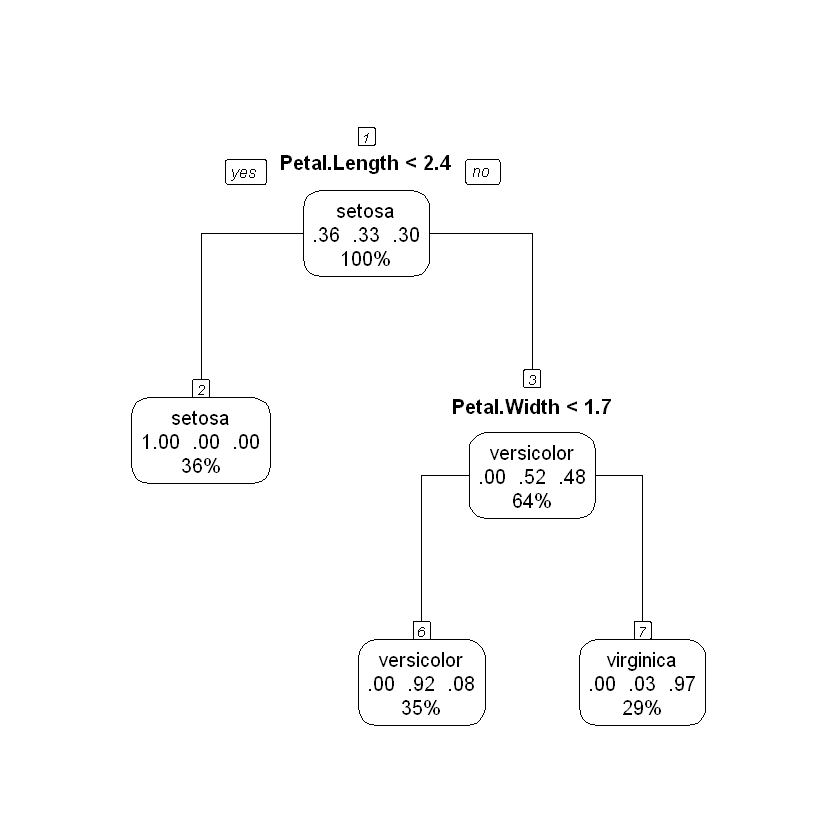

In [14]:
prp(iris.tree, type=1, extra='auto',nn=T, branch=1, varlen=0)

In [15]:
pred_new <- predict(iris.tree, testData, type='class')

In [16]:
accuracy <- table(pred_new, testData$Species)
accuracy <- sum(diag(accuracy))/sum(accuracy)
print(accuracy)

[1] 0.9555556


In [19]:
pred_new_prob <- predict(iris.tree, testData, type='prob')
# pred_new_prob # Probility

In [22]:
newCase <- iris[c(1,10,100,140),]
# newCast$Species <- NULL
# print(newCase)

In [23]:
pred_new <- predict(iris.tree, newCase, type='class')
print(pred_new)

         1         10        100        140 
    setosa     setosa versicolor  virginica 
Levels: setosa versicolor virginica


# Regression Tree

In [24]:
tree.gre <- rpart(Petal.Length ~ Petal.Width, data=trainingData)

In [25]:
tree.gre

n= 105 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 105 329.5819000 3.619048  
   2) Petal.Width< 0.8 38   0.7147368 1.447368 *
   3) Petal.Width>=0.8 67  48.0074600 4.850746  
     6) Petal.Width< 1.55 33  10.2024200 4.215152  
      12) Petal.Width< 1.35 20   3.3400000 3.900000 *
      13) Petal.Width>=1.35 13   1.8200000 4.700000 *
     7) Petal.Width>=1.55 34  11.5344100 5.467647 *

In [30]:
newdf <- data.frame(testData['Petal.Width'])

In [31]:
predictions <- predict(tree.gre, newdf)

In [33]:
mse <- mean((testData$Petal.Length-predictions)^2)
mse

[1] 0.1887508

In [34]:
now <- data.frame(Petal.Width=c(0.25, 1.25, 2.25))

In [35]:
predict_new <- predict(tree.gre, now)
predict_new

1        2        3 
1.447368 3.900000 5.467647

In [36]:
summary(trainingData$Petal.Width)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.100   0.300   1.300   1.144   1.800   2.500 